In [2]:
!pip install pyxlsb --user

In [2]:
import pandas as pd
from pyxlsb import open_workbook as open_xlsb

df = []

with open_xlsb('POC-DATA-JUNE1.xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

cus_seg = pd.DataFrame(df[1:], columns=df[0])

In [4]:
cus_seg=cus_seg.iloc[:,1:]

In [6]:
cus_seg.head()

,CustomerID,VERTICAL,CATEGORY,STATUS,RANK,ACTION,RESULT
0,17314.0,OEM,VIP,Under,854,Protect,Sales Up 5%
1,17373.0,MRO,DRAIN,Watch,2459,Stretch,Sales flat
2,18145.0,CONTRACTOR,VIP,Performing,858,Review with Sales Manager,Quote activity descreased by 2%
3,14467.0,INTEGRATOR,DRAIN,Under,2685,Negotiate T&C,Quote activity increased by 7%
4,12908.0,MOD SHOP,STANDARD,Watch,1007,Protect,GM% erosion by 2%


In [7]:
cus_seg.shape

(4372, 7)

In [8]:
print(cus_seg.CustomerID.nunique())
print(cus_seg.VERTICAL.nunique())
print(cus_seg.CATEGORY.nunique())
print(cus_seg.STATUS.nunique())
print(cus_seg.ACTION.nunique())
print(cus_seg.RESULT.nunique())


4372
5
5
3
4
6


In [9]:
df = []

with open_xlsb('POC-DATA-JUNE1.xlsb') as wb:
    with wb.get_sheet(2) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

plan_2018 = pd.DataFrame(df[1:], columns=df[0])

In [10]:
plan_2018.head(20)

,None,CUSTOMER ID,PLAN 2018,SALES P,None,None,None,None,None,None,None,None
0,None,12346.0,705798.736601,JEFF Y,None,None,None,None,None,None,None,None
1,None,15098.0,560009.353438,GRACE J,None,None,None,PLAN,None,None,2018 SALES,None
2,None,14646.0,543408.468383,JEFF Y,None,None,None,None,None,None,None,None
3,None,12415.0,427219.220246,JEFF Y,None,None,None,Sum of PLAN 2018,None,None,Sum of EXT COST,None
4,None,16203.0,387666.847904,JOHN A,None,None,None,Row Labels,Total,None,Row Labels,Total
5,None,14911.0,303003.676803,JOHN A,None,None,None,GAIL H,3.2541e+06,None,GAIL H,4.72617e+06
6,None,17450.0,280072.779316,GRACE J,None,None,None,GRACE J,2.56324e+06,None,GRACE J,3.98335e+06
7,None,18102.0,242941.175538,JOHN A,None,None,None,JEFF Y,4.79701e+06,None,JEFF Y,6.79509e+06
8,None,17841.0,211097.184685,JOHN A,None,None,None,JOHN A,8.25814e+06,None,JOHN A,1.57515e+07
9,None,18043.0,206130.646108,JOHN A,None,None,None,PETER T,1.04818e+06,None,PETER T,1.60793e+06


In [11]:
sales2018 = plan_2018.iloc[:,1:4]
salesbySP=plan_2018.iloc[5:11,8:]

In [12]:
sales2018.head()

,CUSTOMER ID,PLAN 2018,SALES P
0,12346.0,705798.736601,JEFF Y
1,15098.0,560009.353438,GRACE J
2,14646.0,543408.468383,JEFF Y
3,12415.0,427219.220246,JEFF Y
4,16203.0,387666.847904,JOHN A


In [13]:
salesbySP.columns=["total_actual cost","x","sales_person","extended cost"]
salesbySP =  salesbySP[["sales_person","total_actual cost","extended cost"]]
sales_by_sp = salesbySP.set_index('sales_person')
sales_by_sp.to_csv("SalesbySalesPerson.csv")

In [3]:
sales = pd.read_csv("intuilise/sales.csv")

In [4]:
sales.head()

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
0,568200,PADS,5.00,"2,017",09/25/17,1.0,$5.00,16198,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J
1,568375,BANK CHARGES,5.00,"2,017",09/26/17,1.0,$5.00,13405,United Kingdom,100%,UPS Next day Air,0.0,0.000000,WEST,JEFF Y
2,561226,PADS,5.00,"2,017",07/26/17,1.0,$5.00,15618,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J
3,2550193,PADS,7.08,"2,018",06/08/18,1.0,$7.08,13952,United Kingdom,0%,UPS ground 2nd day,1.0,7.079664,CENTRAL,PETER T
4,550193,PADS,5.00,"2,017",04/15/17,1.0,$5.00,13952,United Kingdom,0%,UPS ground 2nd day,1.0,4.999763,CENTRAL,PETER T


In [5]:
sales[sales['StockCode'] == 'BANK CHARGES']

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
1,568375,BANK CHARGES,5.0,"2,017",09/26/17,1.000,$5.00,13405,United Kingdom,100%,UPS Next day Air,0.0,0.0,WEST,JEFF Y
551386,568375,BANK CHARGES,5.0,"2,017",09/26/17,0.490,$2.45,13405,United Kingdom,100%,UPS Next day Air,0.0,0.0,WEST,JEFF Y
560554,579137,BANK CHARGES,5.0,"2,017",11/28/17,0.874,$4.37,14704,United Kingdom,100%,UPS ground 2nd day,0.0,0.0,SOUTH,GRACE J


In [6]:
sales[' Year '].unique()

array([' 2,017 ', ' 2,018 ', ' 2,016 '], dtype=object)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [9]:
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'], format = '%m/%d/%y', utc = True,errors='coerce')

In [22]:
sales.dtypes

InvoiceNo                        object
StockCode                        object
Quantity Shipped                float64
 Year                            object
Invoice Date        datetime64[ns, UTC]
UnitPrice                       float64
 Ext-Price                       object
CustomerID                        int64
Country                          object
GM%                              object
Shipper                          object
COST                            float64
EXT COST                        float64
REGION                           object
SALES P                          object
OrderPeriod                      object
dtype: object

In [24]:
sales.sort_values(by=['Invoice Date'])


,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,OrderPeriod
375433,536373,82494L,139.32000,"2,016",2016-12-01 00:00:00+00:00,0.941,$131.08,17850,United Kingdom,49%,UPS ground 2nd day,0.48,66.424818,CENTRAL,PETER T,2016-12
435113,536389,22726,162.00000,"2,016",2016-12-01 00:00:00+00:00,1.777,$287.87,12431,Australia,4%,UPS Next day Air,1.70,276.205562,NORTH,JOHN A,2016-12
421375,536368,22914,81.00000,"2,016",2016-12-01 00:00:00+00:00,1.673,$135.53,13047,United Kingdom,17%,UPS ground 3rd day,1.38,111.827287,NORTH,JOHN A,2016-12
170962,536373,37370,6.00000,"2,016",2016-12-01 00:00:00+00:00,1.089,$6.53,17850,United Kingdom,6%,UPS ground 2nd day,1.02,6.123692,CENTRAL,PETER T,2016-12
274381,536378,84997B,108.00000,"2,016",2016-12-01 00:00:00+00:00,0.805,$86.94,14688,United Kingdom,33%,UPS ground 3rd day,0.54,58.190961,NORTH,JOHN A,2016-12
202560,536381,71270,3.00000,"2,016",2016-12-01 00:00:00+00:00,1.026,$3.08,15311,United Kingdom,-10%,UPS Next day Air,1.13,3.388399,NORTH,JOHN A,2016-12
524416,536381,15056BL,1.00000,"2,016",2016-12-01 00:00:00+00:00,1.464,$1.46,15311,United Kingdom,28%,UPS Next day Air,1.05,1.054739,NORTH,JOHN A,2016-12
432903,536388,21115,2.15000,"2,016",2016-12-01 00:00:00+00:00,1.647,$3.54,16250,United Kingdom,39%,UPS ground 3rd day,1.00,2.153461,NORTH,JOHN A,2016-12
464109,536387,22780,9600.00000,"2,016",2016-12-01 00:00:00+00:00,2.084,"$20,004.40",16029,United Kingdom,31%,UPS ground 2nd day,1.44,13788.762080,SOUTH,GRACE J,2016-12
541446,536367,48187,1.00000,"2,016",2016-12-01 00:00:00+00:00,1.083,$1.08,13047,United Kingdom,2%,UPS ground 2nd day,1.07,1.066117,NORTH,JOHN A,2016-12


In [27]:
sales['Invoice Date'].unique()

array([Timestamp('2018-12-27 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-26 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-25 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-24 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-23 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-22 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-21 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-20 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-19 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-18 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-17 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-16 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-15 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-14 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-13 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-12 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-11 00:00:00+0000', tz='UTC'),
       Timestamp('2018-12-10 00:00:00+0000', tz=

In [20]:
print(x)

None


In [10]:
sales['OrderPeriod'] = sales['Invoice Date'].apply(lambda x: x.strftime('%Y-%m'))
sales.head()

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,OrderPeriod
0,568200,PADS,5.00,"2,017",2017-09-25 00:00:00+00:00,1.0,$5.00,16198,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J,2017-09
1,568375,BANK CHARGES,5.00,"2,017",2017-09-26 00:00:00+00:00,1.0,$5.00,13405,United Kingdom,100%,UPS Next day Air,0.0,0.000000,WEST,JEFF Y,2017-09
2,561226,PADS,5.00,"2,017",2017-07-26 00:00:00+00:00,1.0,$5.00,15618,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J,2017-07
3,2550193,PADS,7.08,"2,018",2018-06-08 00:00:00+00:00,1.0,$7.08,13952,United Kingdom,0%,UPS ground 2nd day,1.0,7.079664,CENTRAL,PETER T,2018-06
4,550193,PADS,5.00,"2,017",2017-04-15 00:00:00+00:00,1.0,$5.00,13952,United Kingdom,0%,UPS ground 2nd day,1.0,4.999763,CENTRAL,PETER T,2017-04


In [11]:
sales.to_csv("sales_data.csv")

### 2. Determine the user's cohort group (based on their first order)
*Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.*

In [144]:
sales.set_index('CustomerID', inplace=True)

sales['CohortGroup'] = sales.groupby(level=0)['Invoice Date'].min().apply(lambda x: x.strftime('%Y-%m'))
sales.reset_index(inplace=True)
sales.head()

,CustomerID,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,OrderPeriod,CohortGroup
0,16198,568200,PADS,5.00,"2,017",2017-09-25 00:00:00+00:00,1.0,$5.00,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J,2017-09,2017-09
1,13405,568375,BANK CHARGES,5.00,"2,017",2017-09-26 00:00:00+00:00,1.0,$5.00,United Kingdom,100%,UPS Next day Air,0.0,0.000000,WEST,JEFF Y,2017-09,2017-01
2,15618,561226,PADS,5.00,"2,017",2017-07-26 00:00:00+00:00,1.0,$5.00,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J,2017-07,2017-07
3,13952,2550193,PADS,7.08,"2,018",2018-06-08 00:00:00+00:00,1.0,$7.08,United Kingdom,0%,UPS ground 2nd day,1.0,7.079664,CENTRAL,PETER T,2018-06,2017-04
4,13952,550193,PADS,5.00,"2,017",2017-04-15 00:00:00+00:00,1.0,$5.00,United Kingdom,0%,UPS ground 2nd day,1.0,4.999763,CENTRAL,PETER T,2017-04,2017-04


In [145]:
sales['Quantity Shipped'] = sales['Quantity Shipped'].round(0)

In [146]:
sales['sales'] = np.multiply(sales['Quantity Shipped'],sales['UnitPrice'])

### 3. Rollup data by CohortGroup & OrderPeriod
*Since we're looking at monthly cohorts, we need to aggregate users, orders, and amount spent by the CohortGroup within the month (OrderPeriod).*

In [147]:
grouped = sales.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                       'InvoiceNo': pd.Series.nunique,
                       'Quantity Shipped' : np.sum,
                       'sales' : np.sum})

# make the column names more meaningful
cohorts.rename(columns={'CustomerID': 'Totalcustomers',
                        'InvoiceNo': 'TotalOrders'}, inplace=True)
cohorts.head()


Totalcustomers  TotalOrders  Quantity Shipped  \
CohortGroup OrderPeriod                                                  
2016-12     2016-12                 814         1434         4770960.0   
            2017-01                 299          519          465730.0   
            2017-02                 281          483          381936.0   
            2017-03                 309          572          544357.0   
            2017-04                 286          510          380989.0   

                               sales  
CohortGroup OrderPeriod               
2016-12     2016-12      8853876.038  
            2017-01       651432.359  
            2017-02       477992.382  
            2017-03       695900.703  
            2017-04       455278.506

In [148]:
cohorts

Totalcustomers  TotalOrders  Quantity Shipped  \
CohortGroup OrderPeriod                                                  
2016-12     2016-12                 814         1434         4770960.0   
            2017-01                 299          519          465730.0   
            2017-02                 281          483          381936.0   
            2017-03                 309          572          544357.0   
            2017-04                 286          510          380989.0   
            2017-05                 326          639          463254.0   
            2017-06                 289          545          412968.0   
            2017-07                 310          612          654519.0   
            2017-08                 287          485          441575.0   
            2017-09                 308          598          662690.0   
            2017-10                 287          610          523307.0   
            2017-11                 408          907          957758.0   
            2017-12                 210          307          276696.0   
            2018-01                 235          323          670426.0   
            2018-02                 353          637          538562.0   
            2018-03                 406          929          702019.0   
            2018-04                 499         1407          649182.0   
            2018-05                 537         1853          804903.0   
            2018-06                 567         2162          452552.0   
            2018-07                 555         2171          630140.0   
            2018-08                 508         1701         1823938.0   
            2018-09                 498         1527          803696.0   
            2018-10                 422         1044          521544.0   
            2018-11                 317          594         1186209.0   
            2018-12                 663         1362          397768.0   
            NaT                      90          107            4031.0   
2017-01     2017-01                 370          465          360664.0   
            2017-02                  87          119           70198.0   
            2017-03                  93          121           85722.0   
            2017-04                  86          112           63797.0   
...                                 ...          ...               ...   
2018-03     2018-08                   5            5           31884.0   
            2018-09                   4            4             542.0   
2018-04     2018-04                  25           25            2377.0   
            2018-05                  18           18            1847.0   
            2018-06                  20           20            1183.0   
            2018-07                  19           19            1746.0   
            2018-08                  19           19            9126.0   
            2018-09                  18           18            2405.0   
            2018-10                   7            7            1664.0   
2018-05     2018-05                   6            6            1362.0   
            2018-06                   6            6             639.0   
            2018-07                   5            5            1544.0   
            2018-08                   5            6            1789.0   
            2018-09                   5            5            1012.0   
            2018-10                   5            6            2214.0   
            2018-11                   2            2             532.0   
2018-06     2018-06                  20           20            1281.0   
            2018-07                  18           18            3581.0   
            2018-08                  18           18            7500.0   
            2018-09                  16           16            3005.0   
            2018-10                  15           15            4685.0   
            2018-11          

### 4. Label the CohortPeriod for each CohortGroup
*We want to look at how each cohort has behaved in the months following their first purchase, so we'll need to index each cohort to their first purchase month. For example, CohortPeriod = 1 will be the cohort's first month, CohortPeriod = 2 is their second, and so on.* <br>


*This allows us to compare cohorts across various stages of their lifetime.*

In [149]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['CustomerID', 'Invoice Date', inplace=True)
        df = df.groupby('CustomerID').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

Totalcustomers  TotalOrders  Quantity Shipped  \
CohortGroup OrderPeriod                                                  
2016-12     2016-12                 814         1434         4770960.0   
            2017-01                 299          519          465730.0   
            2017-02                 281          483          381936.0   
            2017-03                 309          572          544357.0   
            2017-04                 286          510          380989.0   

                               sales  CohortPeriod  
CohortGroup OrderPeriod                             
2016-12     2016-12      8853876.038             1  
            2017-01       651432.359             2  
            2017-02       477992.382             3  
            2017-03       695900.703             4  
            2017-04       455278.506             5

In [150]:
#cohorts.to_csv("Intuilize_cohorts.csv")

### 5. Make sure we did all that right
*Let's test data points from the original DataFrame with their corresponding values in the new cohorts DataFrame to make sure all our data transformations worked as expected. As long as none of these raise an exception, we're good.*

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
x = sales[(sales.CohortGroup == '2016-12') & (sales.OrderPeriod == '2016-12')]
y = cohorts.ix[('2016-12', '2016-12')]

assert(x['CustomerID'].nunique() == y['Totalcustomers'])
assert(x['sales'].sum().round(2) == y['sales'].round(2))
assert(x['Quantity Shipped'].sum().round(2) == y['Quantity Shipped'].round(2))
assert(x['InvoiceNo'].nunique() == y['TotalOrders'])

x = sales[(sales.CohortGroup == '2016-12') & (sales.OrderPeriod == '2017-03')]
y = cohorts.ix[('2016-12', '2017-03')]

assert(x['CustomerID'].nunique() == y['Totalcustomers'])
assert(x['sales'].sum().round(2) == y['sales'].round(2))
assert(x['Quantity Shipped'].sum().round(2) == y['Quantity Shipped'].round(2))
assert(x['InvoiceNo'].nunique() == y['TotalOrders'])

x = sales[(sales.CohortGroup == '2017-03') & (sales.OrderPeriod == '2017-05')]
y = cohorts.ix[('2017-03', '2017-05')]

assert(x['CustomerID'].nunique() == y['Totalcustomers'])
assert(x['sales'].sum().round(2) == y['sales'].round(2))
assert(x['Quantity Shipped'].sum().round(2) == y['Quantity Shipped'].round(2))
assert(x['InvoiceNo'].nunique() == y['TotalOrders'])

### User Retention by Cohort Group
*We want to look at the percentage change of each CohortGroup over time -- not the absolute change.*

*To do this, we'll first need to create a pandas Series containing each CohortGroup and its size.*

In [161]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
#cohort_group_size = cohorts['Totalcustomers'].groupby(level=0).first()
cohort_group_size = cohorts['sales'].groupby(level=0).first()
cohort_group_size

CohortGroup
2016-12    8853876.038
2017-01     718018.802
2017-02     318468.269
2017-03     402230.778
2017-04     253303.993
2017-05     283133.289
2017-06     133076.289
2017-07     168878.627
2017-08     138135.224
2017-09     339625.653
2017-10     293384.568
2017-11     362795.797
2017-12      32731.565
2018-01      15757.170
2018-02      77686.375
2018-03        766.097
2018-04       2711.728
2018-05       2329.759
2018-06       1753.706
2018-07       1370.805
2018-12       3473.704
Name: sales, dtype: float64

*Now, we'll need to divide the TotalUsers values in cohorts by cohort_group_size. Since DataFrame operations are performed based on the indices of the objects, we'll use unstack on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row is the CohortPeriod corresponding to that group.*

*To illustrate what unstack does, recall the first five Totalcustomers values:*

In [155]:
#cohorts['sales']
cohorts['Totalcustomers'].head()

CohortGroup  CohortPeriod
2016-12      1               814
             2               299
             3               281
             4               309
             5               286
Name: Totalcustomers, dtype: int64

**And here's what they look like when we unstack the CohortGroup level from the index:**

In [162]:
cohorts['sales'].unstack(0).head()
#cohorts['Totalcustomers'].unstack(0).head()

CohortGroup,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,8853876.038,718018.802,318468.269,402230.778,253303.993,283133.289,133076.289,168878.627,138135.224,339625.653,293384.568,362795.797,32731.565,15757.170,77686.375,766.097,2711.728,2329.759,1753.706,1370.805,3473.704
2,651432.359,118169.174,48962.435,57297.054,41398.152,28697.145,23720.120,13548.276,46811.530,73644.745,57242.298,27953.066,58.754,3851.031,4131.479,1030.925,2100.053,988.374,4305.843,191.931,NaN
3,477992.382,102578.914,100270.128,69994.239,33990.841,37742.472,19886.035,33747.022,99191.844,66490.664,19132.932,519.097,211.710,2395.519,1806.529,572.287,1514.268,1816.896,11012.917,101784.998,NaN
4,695900.703,82196.316,84718.225,106929.873,45993.606,22793.621,35332.151,62320.560,88559.052,10587.011,72.448,2702.631,711.678,2592.058,597.195,611.909,1891.769,2123.301,4433.070,458323.212,NaN
5,455278.506,132493.577,72664.938,64961.297,46309.556,41770.510,47553.137,28795.337,34329.309,1366.546,101.338,2235.388,324.750,1406.118,884.953,747.567,10956.760,1086.135,5592.447,737.809,NaN


*Now, we can utilize broadcasting to divide each column by the corresponding cohort_group_size.*

*The resulting DataFrame, user_retention, contains the percentage of users from the cohort purchasing within the given period. For instance, 31.89% of users in the jan 2017 purchased again in may 2017*

In [163]:
#user_retention = cohorts['Totalcustomers'].unstack(0).divide(cohort_group_size, axis=1)
revenue_retention = cohorts['sales'].unstack(0).divide(cohort_group_size, axis=1)
revenue_retention

CohortGroup,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.073576,0.164577,0.153744,0.142448,0.163433,0.101356,0.178245,0.080225,0.338882,0.216841,0.195110,0.077049,0.001795,0.244399,0.053182,1.345685,0.774433,0.424239,2.455282,0.140013,NaN
3,0.053987,0.142864,0.314851,0.174015,0.134190,0.133303,0.149433,0.199830,0.718078,0.195776,0.065215,0.001431,0.006468,0.152027,0.023254,0.747016,0.558414,0.779864,6.279797,74.251989,NaN
4,0.078598,0.114477,0.266018,0.265842,0.181575,0.080505,0.265503,0.369026,0.641104,0.031173,0.000247,0.007449,0.021743,0.164500,0.007687,0.798736,0.697625,0.911382,2.527830,334.346032,NaN
5,0.051421,0.184527,0.228170,0.161503,0.182822,0.147529,0.357337,0.170509,0.248520,0.004024,0.000345,0.006162,0.009922,0.089237,0.011391,0.975812,4.040508,0.466201,3.188931,0.538230,NaN
6,0.069353,0.160329,0.150539,0.152714,0.145951,0.187885,0.379537,0.051529,0.036980,0.004388,0.002204,0.002182,0.057491,0.046262,0.020943,43.102504,0.844108,1.721942,11.386292,0.000000,NaN
7,0.060119,0.179191,0.219635,0.197785,0.194545,0.164723,0.172458,0.006347,0.021364,0.002070,0.003180,0.010852,0.016897,0.062748,0.005340,0.785703,0.567882,0.266762,0.301346,NaN,NaN
8,0.092781,0.129986,0.192032,0.221576,0.220856,0.051615,0.049268,0.010919,0.009268,0.003606,0.000517,0.003805,0.018490,0.054672,0.000228,NaN,NaN,NaN,NaN,NaN,NaN
9,0.062522,0.350509,0.211779,0.220970,0.091117,0.026942,0.045663,0.018066,0.008638,0.006718,0.007916,0.013697,0.119665,0.014469,0.005822,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
user_retention.to_csv("Intuilize_User_retention.csv")

*Finally, we can plot the cohorts over time in an effort to spot behavioral differences or similarities. Two common cohort charts are line graphs and heatmaps, both of which are shown below.*

*Notice that the first period of each cohort is 100% -- this is because our cohorts are based on each user's first purchase, meaning everyone in the cohort purchased in month 1.*

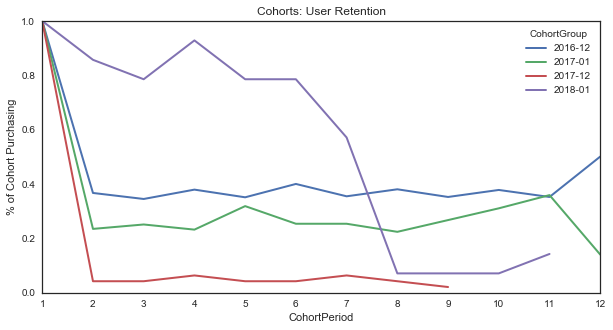

In [159]:
#user_retention[['2016-12','2017-01','2017-12', '2018-01']].plot(figsize=(10,5))
revenue_retention[['2016-12','2017-01','2017-12', '2018-01']].plot(figsize=(10,5))
#plt.title('Cohorts: User Retention')
plt.title('Cohorts: Revenue Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylim(0,1)
plt.ylabel('% of Cohort Purchasing')

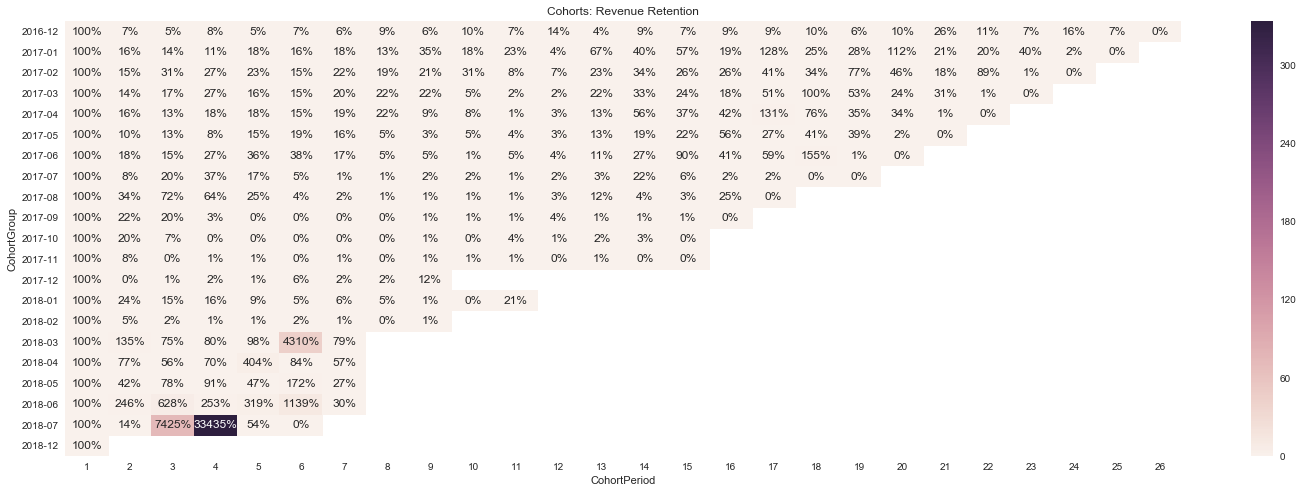

In [167]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(25, 8))
plt.title('Cohorts: Revenue Retention')
#sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')
sns.heatmap(revenue_retention.T, mask=revenue_retention.T.isnull(), annot=True, fmt='.0%');

*Unsurprisingly, we can see from the above chart that fewer users tend to purchase as time goes on.*

*However, we can also see that the cohort from 2018-01 to 2018-06 is the strongest, which enables us to ask targeted questions about this cohort compared to others:*
> * What other attributes (besides first purchase month) do these users share which might be causing them to stick around?
<br>
<br>

> * How were the majority of these users acquired? Was there a specific marketing campaign that brought them in?
<br>
<br>

> * Did they take advantage of a promotion at sign-up? The answers to these questions would inform future marketing and product efforts.

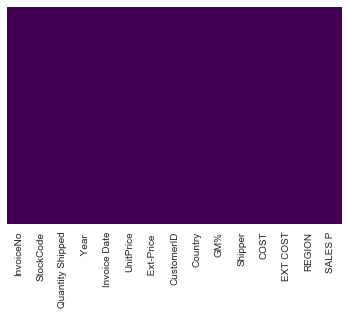

In [58]:
sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
sales.Shipper.nunique()

NameError: name 'sales' is not defined

In [33]:
sales[sales['REGION']=='CENTRAL'].head(40)

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION
3,2550193,PADS,7.08000,2018.0,43259,0.999962,7.079728,13952.0,United Kingdom,0.000009,UPS ground 2nd day,0.999953,7.079664,CENTRAL
4,550193,PADS,5.00000,2017.0,42840,0.999988,4.999940,13952.0,United Kingdom,0.000035,UPS ground 2nd day,0.999953,4.999763,CENTRAL
6,560259,16045,6.45000,2017.0,42933,1.007168,6.496234,13654.0,United Kingdom,0.001941,UPS Next day Air,1.005214,6.483628,CENTRAL
21,568833,16216,2.15000,2017.0,43007,0.991240,2.131166,17348.0,United Kingdom,-0.030656,UPS ground 2nd day,1.021627,2.196498,CENTRAL
25,2557492,16045,7.82600,2018.0,43306,1.001680,7.839148,13717.0,United Kingdom,-0.003528,Delivery Truck,1.005214,7.866801,CENTRAL
27,557750,16219,1.07500,2017.0,42908,1.002460,1.077644,16841.0,United Kingdom,-0.059289,Delivery Truck,1.061895,1.141537,CENTRAL
29,2557750,16219,4.99875,2018.0,43374,1.019650,5.096975,16841.0,United Kingdom,-0.041430,Delivery Truck,1.061895,5.308145,CENTRAL
30,580619,16045,25.80000,2017.0,43074,1.006000,25.954800,15053.0,United Kingdom,0.000782,UPS Next day Air,1.005214,25.934510,CENTRAL
40,558028,16218,1.07500,2017.0,42910,1.006336,1.081811,15128.0,United Kingdom,-0.038199,UPS ground 3rd day,1.044777,1.123135,CENTRAL
42,2558028,16218,1.07500,2018.0,43447,1.011088,1.086920,15128.0,United Kingdom,-0.033319,UPS ground 3rd day,1.044777,1.123135,CENTRAL


In [30]:
df = []

with open_xlsb('POC-DATA-JUNE1.xlsb') as wb:
    with wb.get_sheet(4) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])
product = pd.DataFrame(df[1:], columns=df[0])

In [39]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566309 entries, 434309 to 564242
Data columns (total 16 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
 Year               566309 non-null object
Invoice Date        566076 non-null datetime64[ns, UTC]
UnitPrice           566309 non-null float64
 Ext-Price          566309 non-null object
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null object
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
OrderPeriod         566309 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(10)
memory usage: 73.5+ MB


In [36]:
product.StockCode.nunique()

3958

In [37]:
sales.StockCode.nunique()

3902

In [59]:
x.Commodity.unique()

array(['Studs', 'Screw'], dtype=object)

In [45]:
x = pd.merge(sales, product,how = 'inner')

In [46]:
x.to_csv('Sales_product.csv')

In [60]:
x.shape

(56601, 17)

In [25]:
df = []

with open_xlsb('POC-DATA-JUNE1.xlsb') as wb:
    with wb.get_sheet(5) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])
inven = pd.DataFrame(df[1:], columns=df[0])

In [26]:
inven.head()

,LOCATION,StockCode,DESCRIPTION,QUANTITY ON HAND,UNIT OF MEASURE,UNIT COST,EXTENDED COST,DATE,LAST RECEIPT DATE
0,WSE 1,40005B,None,0.0,EACH,1.049867,0.0,43252.0,43237.0
1,WSE 1,44242A,None,0.0,EACH,0.000000,0.0,43252.0,42057.0
2,WSE 1,37491B,None,0.0,EACH,1.069300,0.0,43252.0,41309.0
3,WSE 1,37491C,None,0.0,EACH,0.720838,0.0,43252.0,42594.0
4,WSE 1,37477B,None,0.0,EACH,0.000000,0.0,43252.0,41614.0


In [27]:
df = []

with open_xlsb('POC-DATA-JUNE1.xlsb') as wb:
    with wb.get_sheet(6) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])
x = pd.DataFrame(df[1:], columns=df[0])

In [34]:
x[x['CustomerID']==17719].head(50)

,None,CustomerID,REGION,SALES PERSON
790,None,17719.0,CENTRAL,GAIL H


In [48]:
df = []

with open_xlsb('POC-DATA-JUNE1.xlsb') as wb:
    with wb.get_sheet(7) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])
y = pd.DataFrame(df[1:], columns=df[0])

In [51]:
y

,StockCode,CATEGORY,HEALTH,BUCKET,HEATING/ COOLING
0,40005B,A,EXCESS,a,HEATING
1,44242A,B,TO WATCH,b,NORMAL
2,37491B,C,PERFORMING,c,COOLING
3,37491C,D,OBSOLETE,d,HEATING
4,37477B,A,TO WATCH,e,NORMAL
5,37477C,B,PERFORMING,a,COOLING
6,21432,C,OBSOLETE,b,HEATING
7,22275,D,TO WATCH,c,NORMAL
8,85226A,A,PERFORMING,d,COOLING
9,90195B,B,EXCESS,e,HEATING


In [50]:
l = pd.merge(sales, y)

In [55]:
l

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,OrderPeriod,CATEGORY,HEALTH,BUCKET,HEATING/ COOLING
0,2558475,85114B,1.000,"2,018",2018-12-27 00:00:00+00:00,0.906,$0.91,14775,United Kingdom,26%,UPS Next day Air,0.67,0.672255,NORTH,JOHN A,2018-12,D,PERFORMING,a,COOLING
1,2539718,85114B,18.900,"2,018",2018-12-20 00:00:00+00:00,0.886,$16.75,16218,United Kingdom,24%,UPS ground 3rd day,0.67,12.705626,NORTH,JOHN A,2018-12,D,PERFORMING,a,COOLING
2,2538839,85114B,34.830,"2,018",2018-12-13 00:00:00+00:00,0.834,$29.04,14606,United Kingdom,19%,UPS Next day Air,0.67,23.414654,NORTH,JOHN A,2018-12,D,PERFORMING,a,COOLING
3,2538418,85114B,16.200,"2,018",2018-12-11 00:00:00+00:00,0.946,$15.33,17372,United Kingdom,29%,UPS ground 3rd day,0.67,10.890537,NORTH,STEPHAN B,2018-12,D,PERFORMING,a,COOLING
4,2538183,85114B,73.224,"2,018",2018-12-09 00:00:00+00:00,0.976,$71.45,16265,United Kingdom,31%,UPS ground 2nd day,0.67,49.225225,NORTH,STEPHAN B,2018-12,D,PERFORMING,a,COOLING
5,2538296,85114B,32.400,"2,018",2018-12-09 00:00:00+00:00,0.897,$29.06,13148,United Kingdom,25%,Delivery Truck,0.67,21.781073,NORTH,STEPHAN B,2018-12,D,PERFORMING,a,COOLING
6,2537823,85114B,12.960,"2,018",2018-12-07 00:00:00+00:00,0.857,$11.10,15923,United Kingdom,22%,UPS ground 2nd day,0.67,8.712429,NORTH,JOHN A,2018-12,D,PERFORMING,a,COOLING
7,2537608,85114B,18.792,"2,018",2018-12-06 00:00:00+00:00,0.878,$16.51,15024,United Kingdom,23%,UPS ground 3rd day,0.67,12.633022,NORTH,JOHN A,2018-12,D,PERFORMING,a,COOLING
8,2550327,85114B,111.000,"2,018",2018-09-29 00:00:00+00:00,0.803,$89.10,12878,United Kingdom,16%,UPS ground 2nd day,0.67,74.620343,CENTRAL,GAIL H,2018-09,D,PERFORMING,a,COOLING
9,2549126,85114B,9.990,"2,018",2018-09-15 00:00:00+00:00,0.929,$9.28,16031,United Kingdom,28%,Delivery Truck,0.67,6.715831,CENTRAL,GAIL H,2018-09,D,PERFORMING,a,COOLING


In [53]:
m = pd.merge(l,product)

In [56]:
m.to_csv("sales_product_stocktype.csv")

In [61]:
m.shape

(55267, 21)

In [52]:
l.to_csv("sales_with_stock_type.csv")

In [58]:
product['Commodity'].unique()

array(['Bolt', 'Nut', 'Washer', 'Screw', 'Studs'], dtype=object)

In [ ]:
* If we get the invoice date we can use the time series data for each customer and predict the sales of 2018 and can validate with tha 2018 plan data sheet. 

* RFM can be done for segmentation

* I will try various clustering algorithms and check which type of clustering gives an approximate result.

* How are we ranking the customers? Suggest any process that any of you have in mind.

* I am assuming that sum of difference of ext price & ext cost will be the profit that company makes. if i am not wrong we can use it as a factor out of many, 
  to decide the rank. RFM will also help in the ranking procedure. we can generate another feature based on their RFM results that has like 0 - 5 rating to indicate how impoertant the customer is
  which we can later use to decide which sales person should we alloted to a certain customer since the sales person may be good with dealing with selected type of customers which implies 
  they are capable to deal with those kinda people with such RFM or may be take a case where we can randomize the the type of customers to each of them and see how they do in terms of sales and they we can do the hypothesis testing to see 
  if there is significant efficiency in terms of functionality of the company because it will save a lot of time. Any Ideas on this?? I will highly appreciate but i know this is sonething fo future. I know that :P
    
* After we are done with this we can design a product recommendation system to pitch in new product to the customers using collaborative filtering or any other basic 
  technique utilizing the pattern each customer follow.# we can refer product sheet and inventory datasheet, product commodity and sales data sheet
    
* we can do some research on the transportation costs associated with each type of transportation mode and do A/B testing nn support of proposed mode of transportation for example 
  if we subtract the inventory product price from the actual selling price we will get the transportation data and we can try to 
  come up with new transportation strategy that would cost less expense and can increase profit. to assure we care do some statistical analysis to prove our point. 
  I have few in mind to apply to validate the performance of strategy.
    
Whatever seems feasible we can work on that.